<a href="https://colab.research.google.com/github/kieranfmaguire/learningdeeplearning/blob/main/notebooks/Fine_Tune_BERT_for_Text_Classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align=center> Fine-Tune BERT for Text Classification with TensorFlow</h2>

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 1: BERT Classification Model</p>
</div>

In this [project](https://www.coursera.org/projects/fine-tune-bert-tensorflow/), you will learn how to fine-tune a BERT model for text classification using TensorFlow and TF-Hub.

The pretrained BERT model used in this project is [available](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2) on [TensorFlow Hub](https://tfhub.dev/).

### Learning Objectives

By the time you complete this project, you will be able to:

- Build TensorFlow Input Pipelines for Text Data with the [`tf.data`](https://www.tensorflow.org/api_docs/python/tf/data) API
- Tokenize and Preprocess Text for BERT
- Fine-tune BERT for text classification with TensorFlow 2 and [TF Hub](https://tfhub.dev)

### Prerequisites

In order to be successful with this project, it is assumed you are:

- Competent in the Python programming language
- Familiar with deep learning for Natural Language Processing (NLP)
- Familiar with TensorFlow, and its Keras API

### Contents

This project/notebook consists of several Tasks.

- **[Task 1]()**: Introduction to the Project.
- **[Task 2]()**: Setup your TensorFlow and Colab Runtime
- **[Task 3]()**: Download and Import the Quora Insincere Questions Dataset
- **[Task 4]()**: Create tf.data.Datasets for Training and Evaluation
- **[Task 5]()**: Download a Pre-trained BERT Model from TensorFlow Hub
- **[Task 6]()**: Tokenize and Preprocess Text for BERT
- **[Task 7]()**: Wrap a Python Function into a TensorFlow op for Eager Execution
- **[Task 8]()**: Create a TensorFlow Input Pipeline with `tf.data`
- **[Task 9]()**: Add a Classification Head to the BERT `hub.KerasLayer`
- **[Task 10]()**: Fine-Tune BERT for Text Classification
- **[Task 11]()**: Evaluate the BERT Text Classification Model

## Task 2: Setup your TensorFlow and Colab Runtime.

You will only be able to use the Colab Notebook after you save it to your Google Drive folder. Click on the File menu and select “Save a copy in Drive…

![Copy to Drive](https://drive.google.com/uc?id=1CH3eDmuJL8WR0AP1r3UE6sOPuqq8_Wl7)


### Check GPU Availability

Check if your Colab notebook is configured to use Graphical Processing Units (GPUs). If zero GPUs are available, check if the Colab notebook is configured to use GPUs (Menu > Runtime > Change Runtime Type).

![Hardware Accelerator Settings](https://drive.google.com/uc?id=1qrihuuMtvzXJHiRV8M7RngbxFYipXKQx)


In [2]:
!nvidia-smi

Fri Nov 27 09:52:48 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Install TensorFlow and TensorFlow Model Garden

In [1]:
import tensorflow as tf
print(tf.version.VERSION)

2.3.0


In [3]:
!pip install -q tensorflow==2.3.0

In [4]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2319/2319), done.
remote: Total 2650 (delta 511), reused 1351 (delta 298), pack-reused 0
Receiving objects: 100% (2650/2650), 34.01 MiB | 13.04 MiB/s, done.
Resolving deltas: 100% (511/511), done.
Note: checking out '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>



In [5]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

     |████████████████████████████████| 71kB 3.8MB/s 
     |████████████████████████████████| 215kB 5.9MB/s 
     |████████████████████████████████| 14.5MB 248kB/s 
     |████████████████████████████████| 471kB 68.0MB/s 
     |████████████████████████████████| 102kB 14.5MB/s 
     |████████████████████████████████| 25.9MB 89kB/s 
     |████████████████████████████████| 174kB 73.0MB/s 
     |████████████████████████████████| 3.6MB 54.1MB/s 
     |████████████████████████████████| 1.1MB 56.5MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
     |████████████████████████████████| 358kB 62.5MB/s 
     |████████████████████████████████| 1.1MB 66.7MB/s 
     |████████████████████████████████| 11.6MB 54.2MB/s 
     |████████████████████████████████| 36.7MB 89kB/s 
     |████████████████████████████████| 276kB 65.1MB/s 
     |████████████████████████████████| 2.2MB 56.9MB/s 
     |████████████████████████████████| 92kB 12.0MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
 

## Restart the Runtime

**Note** 
After installing the required Python packages, you'll need to restart the Colab Runtime Engine (Menu > Runtime > Restart runtime...)

![Restart of the Colab Runtime Engine](https://drive.google.com/uc?id=1xnjAy2sxIymKhydkqb0RKzgVK9rh3teH)

## Task 3: Download and Import the Quora Insincere Questions Dataset

In [3]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

In [4]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.3.0
Eager mode:  True
Hub version:  0.10.0
GPU is available


A downloadable copy of the [Quora Insincere Questions Classification data](https://www.kaggle.com/c/quora-insincere-questions-classification/data) can be found [https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip](https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip). Decompress and read the data into a pandas DataFrame.

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [38]:
questions_url = "https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip"
questions = pd.read_csv(questions_url)

<AxesSubplot:ylabel='Frequency'>

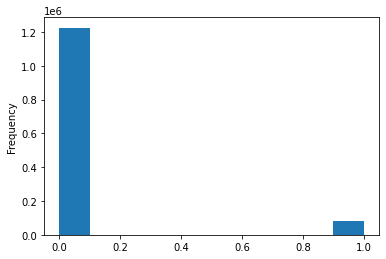

In [39]:
questions.target.plot(kind='hist')


## Task 4: Create tf.data.Datasets for Training and Evaluation

In [40]:
train_df, remaining = train_test_split(questions, random_state=42, train_size=0.0075, stratify=questions.target.values)
valid_df, _ = train_test_split(remaining, random_state=42, stratify=remaining.target.values, train_size=0.00075)

In [41]:
with tf.device('/cpu:0'):
  train_data = tf.data.Dataset.from_tensor_slices((train_df['question_text'].values, train_df['target'].values))
  valid_data = tf.data.Dataset.from_tensor_slices((valid_df['question_text'].values, valid_df['target'].values))

  for text, label in train_data.take(1):
    print(text)
    print(label)

tf.Tensor(b'Why are unhealthy relationships so desirable?', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


## Task 5: Download a Pre-trained BERT Model from TensorFlow Hub

In [10]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""

label_list = [0, 1] # Label categories
max_seq_len = 128   # maximum length of (token) input sequences
train_batch_size = 32


# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2",
                            trainable=True)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [34]:
# example of tokenizing
tokenizer.convert_tokens_to_ids(
  tokenizer.wordpiece_tokenizer.tokenize('hello, i am testing the tokenizer')
)

[7592, 29623, 1045, 2572, 5604, 1996, 19204, 17629]

## Task 6: Tokenize and Preprocess Text for BERT

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1-SpKFELnEvBMBqO7h3iypo8q9uUUo96P' />
    <p style="text-align: center;color:gray">Figure 2: BERT Tokenizer</p>
</div>

We'll need to transform our data into a format BERT understands. This involves two steps. First, we create InputExamples using `classifier_data_lib`'s constructor `InputExample` provided in the BERT library.

In [42]:
# This provides a function to convert row to input features and label

def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_len, tokenizer=tokenizer):
  example = classifier_data_lib.InputExample(guid=None,
                                             text_a=text.numpy(),
                                             text_b=None,
                                             label=label.numpy())
  feature = classifier_data_lib.convert_single_example(0, example, label_list, max_seq_length, tokenizer)
  return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)

  
  

You want to use [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) to apply this function to each element of the dataset. [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) runs in graph mode.

- Graph tensors do not have a value.
- In graph mode you can only use TensorFlow Ops and functions.

So you can't `.map` this function directly: You need to wrap it in a [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function). The [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function) will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

## Task 7: Wrap a Python Function into a TensorFlow op for Eager Execution

In [43]:
def to_feature_map(text, label):

    input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, inp=[text, label],
                                                                  Tout=[tf.int32, tf.int32, tf.int32, tf.int32])
    input_ids.set_shape([max_seq_len])
    input_mask.set_shape([max_seq_len])
    segment_ids.set_shape([max_seq_len])
    label_id.set_shape([])

    x = {
        'input_word_ids': input_ids,
         'input_mask': input_mask,
         'input_type_ids': segment_ids
    }
    return (x, label_id)

## Task 8: Create a TensorFlow Input Pipeline with `tf.data`

In [44]:
with tf.device('/cpu:0'):
  # train
  train_data = train_data.map(to_feature_map, num_parallel_calls=tf.data.experimental.AUTOTUNE)\
    .shuffle(int(1e4))\
    .batch(train_batch_size, drop_remainder=True)\
    .prefetch(tf.data.experimental.AUTOTUNE)

  # valid
  valid_data = valid_data.map(to_feature_map, num_parallel_calls=tf.data.experimental.AUTOTUNE)\
      .batch(train_batch_size, drop_remainder=True)\
      .prefetch(tf.data.experimental.AUTOTUNE)
  

The resulting `tf.data.Datasets` return `(features, labels)` pairs, as expected by [`keras.Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

In [15]:
# train data spec
train_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [16]:
# valid data spec
valid_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

## Task 9: Add a Classification Head to the BERT Layer

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 3: BERT Layer</p>
</div>

In [45]:
# Building the model
def create_model():
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_len,), dtype=tf.int32, name='input_word_ids')
  input_mask = tf.keras.layers.Input(shape=(max_seq_len,), dtype=tf.int32, name='input_mask')
  segment_ids = tf.keras.layers.Input(shape=(max_seq_len,), dtype=tf.int32, name='input_type_ids')
  pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
  drop = tf.keras.layers.Dropout(0.4)(pooled_output)
  output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(drop)

  model = tf.keras.Model(inputs={'input_word_ids': input_word_ids, 'input_mask': input_mask, 'input_type_ids': segment_ids}, outputs=output)
  return model

## Task 10: Fine-Tune BERT for Text Classification

In [46]:
m = create_model()
m.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
          optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
          metrics=[tf.keras.metrics.BinaryAccuracy()])
m.summary()


Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_type_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]      

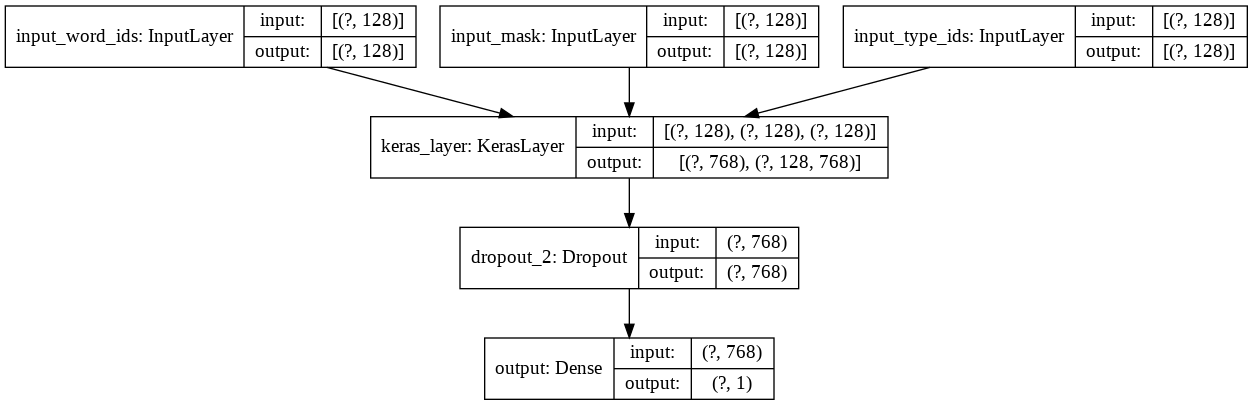

In [47]:
tf.keras.utils.plot_model(m, show_shapes=True, show_layer_names=True)

In [48]:
# Train model
history = m.fit(train_data, epochs=4, validation_data=valid_data, verbose=1)

Epoch 1/4
306/306 [==============================] - ETA: 0s - loss: 0.1931 - binary_accuracy: 0.9313WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0152s vs `on_test_batch_end` time: 0.1381s). Check your callbacks.


306/306 [==============================] - 147s 479ms/step - loss: 0.1931 - binary_accuracy: 0.9313 - val_loss: 0.1354 - val_binary_accuracy: 0.9552
Epoch 2/4
306/306 [==============================] - 146s 477ms/step - loss: 0.1171 - binary_accuracy: 0.9568 - val_loss: 0.1443 - val_binary_accuracy: 0.9594
Epoch 3/4
306/306 [==============================] - 146s 477ms/step - loss: 0.0823 - binary_accuracy: 0.9699 - val_loss: 0.1617 - val_binary_accuracy: 0.9594
Epoch 4/4
306/306 [==============================] - 146s 477ms/step - loss: 0.0470 - binary_accuracy: 0.9838 - val_loss: 0.1742 - val_binary_accuracy: 0.9500


## Task 11: Evaluate the BERT Text Classification Model

In [49]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

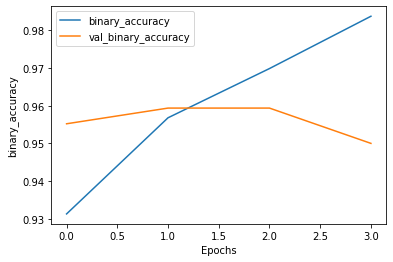

In [50]:
plot_graphs(history, 'binary_accuracy')

In [81]:
sample_example = ["should I trust this model?"]
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = test_data.map(to_feature_map).batch(1)
preds = m.predict(test_data)
y_hat = 'toxic' if preds >= 0.5 else 'normal'
print(f"The question was: {y_hat} (score is {preds[0][0]:.2f})")

The question was: normal (score is 0.00)
